<a href="https://colab.research.google.com/github/hectorpena19/Work-Projects/blob/main/ImageStack_Crop_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prerequisites



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 470_Ch_06.gdoc
 470_ch_08.gdoc
 470_Ch_09.gdoc
 470_Ch_11.gdoc
 470_ch_13.gdoc
'470_chapter_07 .gdoc'
 470_Exam_03_SG.gdoc
'Alpha Sigma Phi Final Report Fall 2017.xlsx'
'Analysis of Anions Post-Lab .docx'
'Associate Affidavit.doc'
'Buffers Post-lab .docx'
'CCE rules.pdf'
'Circulatory and Nervous Lab Notes.docx'
'Class notes (1).gdoc'
'Class notes.gdoc'
'Clients - Personal Training'
'Colab Notebooks'
'Copy of By Body Part Workout -Original.gsheet'
'Copy of Push Pull Workout template - OTA.gsheet'
"Day 4 Kid's Camp PT Sessions COMPLETED.docx"
'December 6, 2017.gdoc'
 deferred-findings-form.pdf
'Doc Feb 28, 2017, Equilibrium Constant.pdf'
'Doc Oct 02, 2018, 14:42.pdf'
'Equilibrium Constant Post Lab .docx'
'Exam 4 Study Guide.gdoc'
'Fall 2017'
'Fin 223.docx'
 Final__-_FP_A_Excel_Test.xlsx
'Frosh 2015-2016'
'Google Ads Certifications'
'Hector Pena.docx'
'HectorP_

In [ ]:
# Import block of packages
import os
import glob
import numpy as np
import cv2
import tifffile as tifffile  # Import tifffile for saving TIFF images
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from PIL import Image
from scipy import ndimage as ndi
from google.colab.patches import cv2_imshow  # Import the cv2_imshow function

from skimage import (
    exposure, feature, filters, io, measure, morphology,
    restoration, segmentation, transform, util, img_as_ubyte,
    img_as_float64, img_as_float32, img_as_int, img_as_uint
)
from skimage.exposure import histogram
from skimage.data import camera


In [ ]:
# SUPER IMPORTANT #
!pip install tifffile==2020.5.25

## Image Stacker
This grabs our vertical slices and puts them back together

**Note:** File will be over 1GB. Only needs to ran once.

In [ ]:
################### Intial Directory Information ##############################
# Paths #

# Put the path of the directory you want to grab your data from
direct_path = '/content/drive/MyDrive/test LTAR 5.2'  ## this is the most important step ##
# Put the name for the image stack you want here
input_dir = os.path.join(direct_path, 'background') ### in this case we are using 'background'
##### This creats a folder in which we will be putting our outputs
output_dir = os.path.join(direct_path, 'mock')



###############################################################################

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
filenames = os.listdir(input_dir)

# Define the sort order (replace with your desired logic)
sort_idx = range(len(filenames))  # Example: iterate in original order

# Output TIFF file path
output_tiff_path = os.path.join(output_dir, 'ltar52_mock.tiff')

# Write images to a TIFF stack
with tifffile.TiffWriter(output_tiff_path, bigtiff=True) as stack:
    for i in sort_idx:
        filename = filenames[i]
        # Construct the full path to the image file
        full_path = os.path.join(input_dir, filename)

        # Save the image to the TIFF stack
        stack.save(io.imread(full_path))

print(i)
print("Saving complete.")


889
Saving complete.


## Reslicer
* tiff stacker unstacker

In [ ]:
# Using 'output_dir' as this will place file in correct path
directn= output_dir
# Put the new folder name here
# new_dir_name= 'reslice'
new_dir_name = os.path.join(directn, 'reslice')  # Combine paths

if not os.path.exists(new_dir_name):
      os.makedirs(new_dir_name, exist_ok=True) # Create directory only if it doesn't exist

# Put name of filepath and file name for the image stack you want to split here:
img=io.imread_collection(output_tiff_path, plugin='tifffile') # output_tiff_path is the path of file
img=np.array(img)

Z=img.shape
r,w,h,b = Z
reshaped_img = img.reshape(r*w,h,b)
Z=reshaped_img.shape
# print(reshaped_img.shape)
print(Z)


#save
for i in range(Z[1]):
        #  io.imsave(new_dir_name+'/'+'all_tissues_resliced%s.png'%i, (img[:,:,i]))
         io.imsave(new_dir_name+'/'+f'all_tissues_resliced_{i}.png', (reshaped_img[:,i,:]))
        #  io.imsave(new_dir_name+'/'+f'all_tissues_resliced_{i}.png', (Z[:,i,:]))



(890, 1967, 889)


## Selection of first and last + overlay

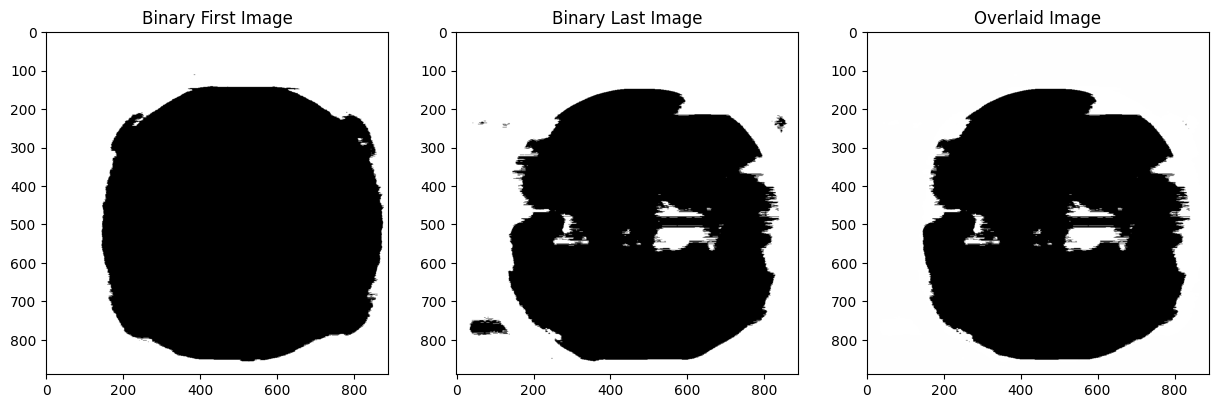

In [ ]:
# Directory where you want to save the resliced images
# directn = '/content/drive/MyDrive/test LTAR 5.2/reslice ltar52/' # dont need it because its being used
# Put the new folder name here
new_dir_name = os.path.join(directn, 'overlay')

if not os.path.exists(new_dir_name):
    os.makedirs(new_dir_name, exist_ok=True)

# Get the first and last images
first_image = reshaped_img[:, 0, :]
last_image = reshaped_img[:, -1, :]


# Threshold the images to create binary images
binary_first_image = np.where(first_image > 0, 1, 0)
binary_last_image = np.where(last_image > 0, 1, 0)

# Overlay the images; overlap will result in 2
overlaid_image = binary_first_image + binary_last_image

# Convert binary images to 8-bit format for saving
binary_first_image_8bit = (binary_first_image * 255).astype(np.uint8)
binary_last_image_8bit = (binary_last_image * 255).astype(np.uint8)
overlaid_image_8bit = (overlaid_image * 255).astype(np.uint8)

# Preview the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_first_image_8bit, cmap='gray')
plt.title('Binary First Image')

plt.subplot(1, 3, 2)
plt.imshow(binary_last_image_8bit, cmap='gray')
plt.title('Binary Last Image')

plt.subplot(1, 3, 3)
plt.imshow(overlaid_image_8bit, cmap='gray')
plt.title('Overlaid Image')


plt.show()

# Save the images
overlaid_path = os.path.join(new_dir_name, 'overlaid_image.png')
io.imsave(overlaid_path, overlaid_image_8bit)


Number of contours detected: 7


<ipython-input-8-16ad99e420b2>:58: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  scaled_box = np.int0(scaled_box)


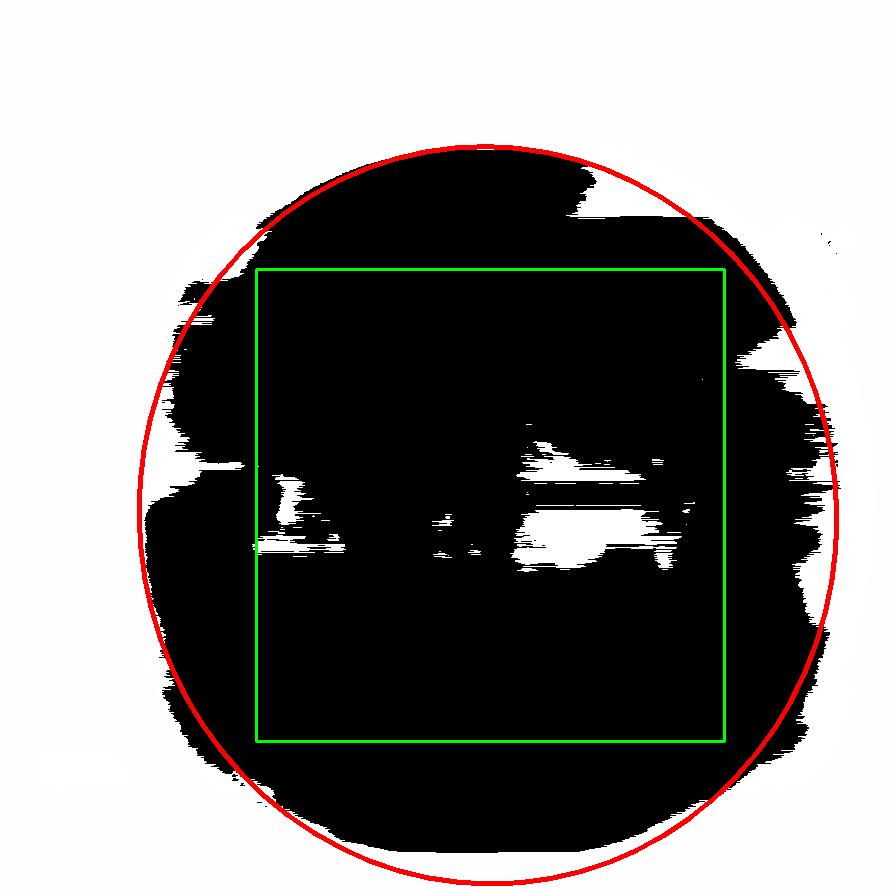

In [ ]:
# Load the input image
img = cv2.imread(overlaid_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# cv2_imshow(img)

# Apply thresholding to convert grayscale to binary image
ret, thresh = cv2.threshold(gray, 150, 255, 1)

# Applying morphological close
kernel = np.ones((13,13),np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# preview thresh
# cv2_imshow(thresh)

############################# Adding Ellipse ###################################

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:", len(contours))

# Filter out contours with fewer than 5 points
valid_contours = [cnt for cnt in contours if len(cnt) >= 5]

# Check if we have valid contours
if valid_contours:
    # Select the contour with the largest area
    largest_contour = max(valid_contours, key=cv2.contourArea)

    # Fit the ellipse to the selected largest contour
    ellipse = cv2.fitEllipse(largest_contour)

    # Draw the ellipse on the input image
    cv2.ellipse(img, ellipse, (0, 0, 255), 3)

    ############################### Adding Box ##################################
    # Find the minimum area rectangle that encloses the contour
    rect = cv2.boundingRect(largest_contour)

    # Convert bounding rect (x, y, w, h) to box points
    box = np.array([[rect[0], rect[1]],
                    [rect[0] + rect[2], rect[1]],
                    [rect[0] + rect[2], rect[1] + rect[3]],
                    [rect[0], rect[1] + rect[3]]])


    # Define the center of the ellipse
    center_of_ellipse = ellipse[0]

    # Scale the box by 0.707 * 0.95 (scaling it down by 95% of its original size)
    scale_factor = 0.707 * 0.95

    # Shift each corner towards the center by multiplying the displacement from the center by the scale factor
    scaled_box = center_of_ellipse + scale_factor * (box - center_of_ellipse)

    # Convert the scaled box coordinates to integer for drawing
    scaled_box = np.int0(scaled_box)

    # Draw the scaled bounding box
    cv2.drawContours(img, [scaled_box], 0, (0, 255, 0), 2)

    # Display the result
    cv2_imshow(img)
else:
    print("No valid contours with enough points to fit an ellipse.")

# cv2.waitKey(0)
# cv2.destroyAllWindows()


Number of contours detected: 7


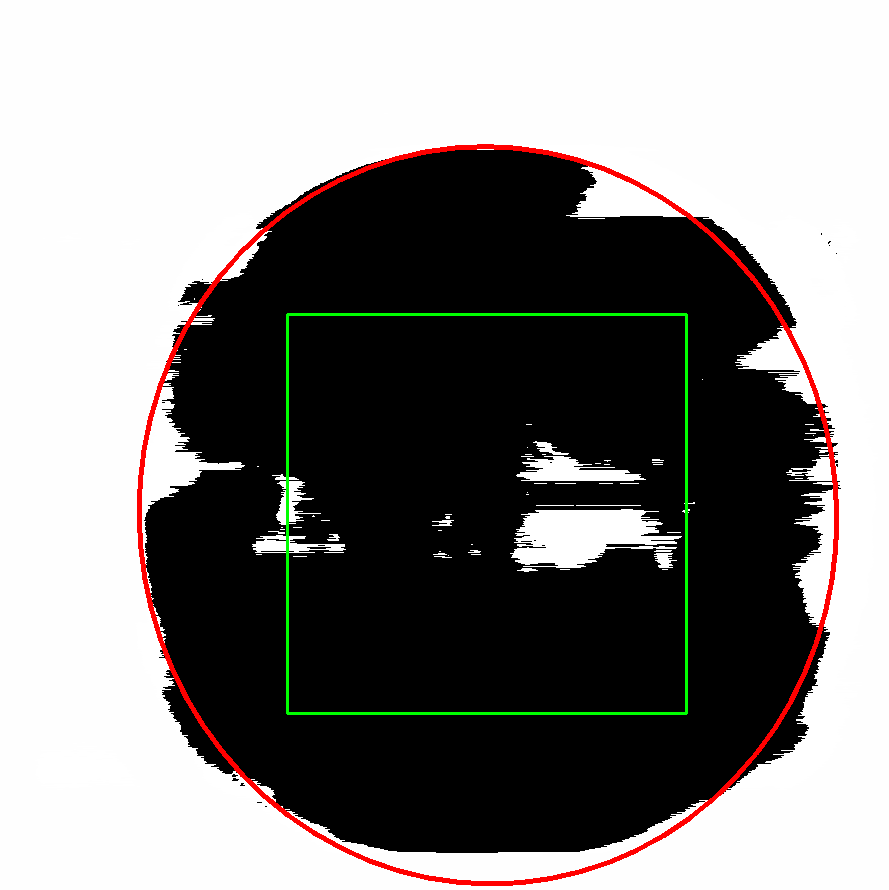

In [ ]:
# Load the input image
img = cv2.imread(overlaid_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to convert grayscale to binary image
ret, thresh = cv2.threshold(gray, 150, 255, 1)

# Applying morphological close
kernel = np.ones((13, 13), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

############################# Adding Ellipse and Bounding Box ###################################

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:", len(contours))

# Filter out contours with fewer than 5 points
valid_contours = [cnt for cnt in contours if len(cnt) >= 5]

# Check if we have valid contours
if valid_contours:
    # Select the contour with the largest area
    largest_contour = max(valid_contours, key=cv2.contourArea)

    # Fit the ellipse to the selected largest contour
    ellipse = cv2.fitEllipse(largest_contour)

    # Draw the ellipse on the input image
    cv2.ellipse(img, ellipse, (0, 0, 255), 3)

    ######################### Adding Bounding Box ###########################

    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Use the center of the ellipse as the center of the rectangle
    center_x, center_y = int(ellipse[0][0]), int(ellipse[0][1])

    # Set width and height of the rectangle
    w = 400
    h = 400

    # Calculate the top-left corner coordinates
    x = center_x - (w // 2)
    y = center_y - (h // 2)

    # Define new_box with the calculated coordinates
    new_box = (x, y, w, h)

    # Convert new_box (x, y, w, h) into four corner points
    new_box_points = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])

    # Draw the bounding box on the image (in green)
    cv2.rectangle(img, new_box, (0, 255, 0), 2)

# Display the resulting image with the ellipse and bounding box
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

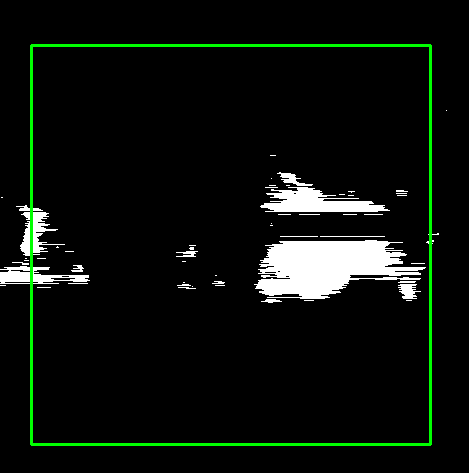

In [ ]:
# Create a mask for the bounding box
mask = np.zeros_like(gray)
cv2.fillConvexPoly(mask, scaled_box, 255)

# Extract the region of interest (ROI) from the original image using the mask
roi = cv2.bitwise_and(img, img, mask=mask)

# Find bounding rectangle of the scaled box for cropping
x, y, w, h = cv2.boundingRect(scaled_box)
cropped_image = roi[y:y+h, x:x+w]

# Display the cropped image
cv2_imshow(cropped_image)


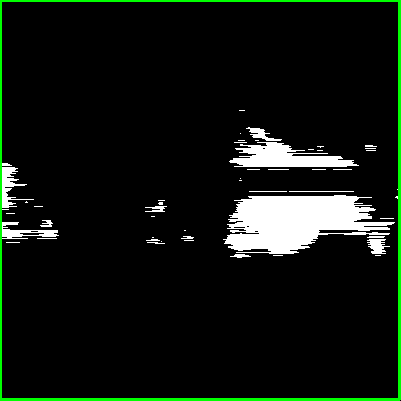

In [ ]:
# Create a mask for the bounding box
mask_square = np.zeros_like(gray)
cv2.fillConvexPoly(mask_square, new_box_points, 255)

# Extract the region of interest (ROI) from the original image using the mask
roi = cv2.bitwise_and(img, img, mask=mask_square)

# Find bounding rectangle of the scaled box for cropping
x, y, w, h = cv2.boundingRect(new_box_points)
cropped_image = roi[y:y+h, x:x+w]

# Display the cropped image
cv2_imshow(cropped_image)

In [ ]:
# stop

## Applying crop other image folder (solids, air, organic matter)
- this really doesnt matter, its whatever you choose


In [ ]:
# Paths #
# Put the path of the directory you want to grab your data from
direct_path = direct_path #already being used above
# Put the name for the image stack you want here
input_dir = os.path.join(direct_path, 'solid') ### in this case we are using 'background'


##### This creats a folder in which we will be putting our outputs
output_dir = os.path.join(direct_path, 'final')

###################################################################################

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
filenames = os.listdir(input_dir)

# Define the sort order (replace with your desired logic)
sort_idx = range(len(filenames))  # Example: iterate in original order

# Output TIFF file path
output_tiff_path = os.path.join(output_dir, 'ltar52_final.tiff')

# Write images to a TIFF stack
with tifffile.TiffWriter(output_tiff_path, bigtiff=True) as stack:
    for i in sort_idx:
        filename = filenames[i]
        # Construct the full path to the image file
        full_path = os.path.join(input_dir, filename)

        # Save the image to the TIFF stack
        stack.save(io.imread(full_path))

print(i)
print("Saving complete.")


889
Saving complete.


In [ ]:
# Using 'output_dir' as this will place file in correct path
directn= output_dir
# Put the new folder name here
new_dir_name = os.path.join(directn, 'reslice')  # Combine paths

# os.makedirs(new_dir_name)
if not os.path.exists(new_dir_name):
      os.makedirs(new_dir_name, exist_ok=True) # Create directory only if it doesn't exist

# Put name of filepath and file name for the image stack you want to split here:
img=io.imread_collection(output_tiff_path, plugin='tifffile') # output_tiff_path is the path of file
img=np.array(img)

Z=img.shape
r,w,h,b = Z
reshaped_img = img.reshape(r*w,h,b)
Z=reshaped_img.shape
# print(reshaped_img.shape)
print(Z)

#save
for i in range(Z[1]):
        #  io.imsave(new_dir_name+'/'+'all_tissues_resliced%s.png'%i, (img[:,:,i]))
         io.imsave(new_dir_name+'/'+f'all_tissues_resliced_{i}.png', (reshaped_img[:,i,:]))
        # #  io.imsave(new_dir_name+'/'+f'all_tissues_resliced_{i}.png', (Z[:,i,:]))


(890, 1967, 889)


In [ ]:
#################### Extracts Largest Bounding Rect ############################


# # Paths
# # input_dir = '/content/drive/MyDrive/test LTAR 5.2/reslice ltar52/reslice'
# input_dir = new_dir_name
# output_dir= os.path.join(directn, 'masked_reslice')

# # Create output directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# # Get list of image files in the input directory
# image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff'))]

# for image_file in image_files:
#     img_path = os.path.join(input_dir, image_file)
#     img = cv2.imread(img_path)

#     # # Apply the mask to the image
#     # masked_image = cv2.bitwise_and(img, img, mask=mask)


#     # Extract the region of interest (ROI) from the original image using the mask
#     roi = cv2.bitwise_and(img, img, mask=mask)

#     # Find bounding rectangle of the scaled box for cropping
#     x, y, w, h = cv2.boundingRect(scaled_box)
#     cropped_image = roi[y:y+h, x:x+w]

#     # Save the masked image
#     output_path = os.path.join(output_dir, image_file)
#     cv2.imwrite(output_path, cropped_image)

# print("Masking complete.")


################################################################################

In [ ]:
######################## Extracts Fix Bound Rect ###############################

# Paths
# input_dir = '/content/drive/MyDrive/test LTAR 5.2/reslice ltar52/reslice'
input_dir = new_dir_name
output_dir= os.path.join(directn, 'masked_reslice')

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get list of image files in the input directory
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff'))]

for image_file in image_files:
    img_path = os.path.join(input_dir, image_file)
    img = cv2.imread(img_path)

    # # Apply the mask to the image
    # masked_image = cv2.bitwise_and(img, img, mask=mask)


    # Extract the region of interest (ROI) from the original image using the mask
    roi = cv2.bitwise_and(img, img, mask=mask_square)

    # Find bounding rectangle of the scaled box for cropping
    x, y, w, h = cv2.boundingRect(new_box_points)
    cropped_image = roi[y:y+h, x:x+w]

    # Save the masked image
    output_path = os.path.join(output_dir, image_file)
    cv2.imwrite(output_path, cropped_image)

print("Masking complete.")

Masking complete.


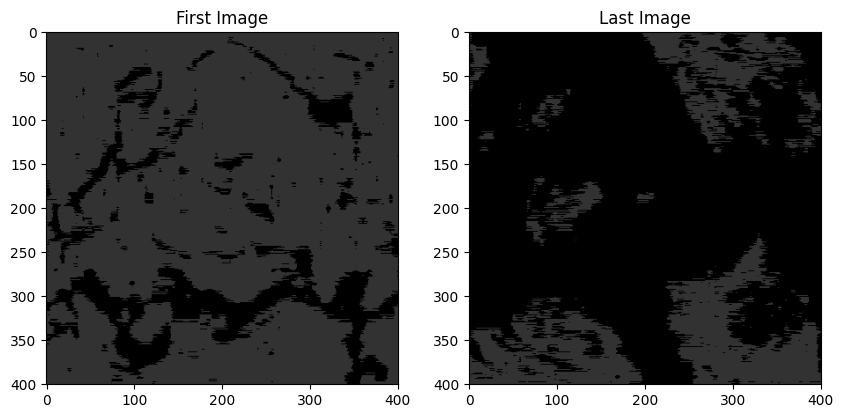

In [ ]:
############# Displays First and Last Image from Bound Rect ####################

# Assuming 'directn' is already defined as the parent directory
masked_reslice_dir = output_dir

# Get the list of image files in the masked_reslice directory
image_files = [f for f in os.listdir(masked_reslice_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff'))]

# Load the first and last images
first_image_path = os.path.join(masked_reslice_dir, image_files[0])
last_image_path = os.path.join(masked_reslice_dir, image_files[-1])

first_image = io.imread(first_image_path)
last_image = io.imread(last_image_path)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(first_image)
plt.title('First Image')

plt.subplot(1, 2, 2)
plt.imshow(last_image)
plt.title('Last Image')

plt.show()